<a href="https://colab.research.google.com/github/Geez-l/litoX/blob/bri-prop/SP_DL/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Morphometric and Morphological Sex Identification of *Tegillarca granosa (T. granosa)* Blood Cockles**

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Folders

In [ ]:
import os

male_litob = "/content/drive/My Drive/SP 2024/Male-Litob"
female_litob = "/content/drive/My Drive/SP 2024/Female-Litob"

## Read Images

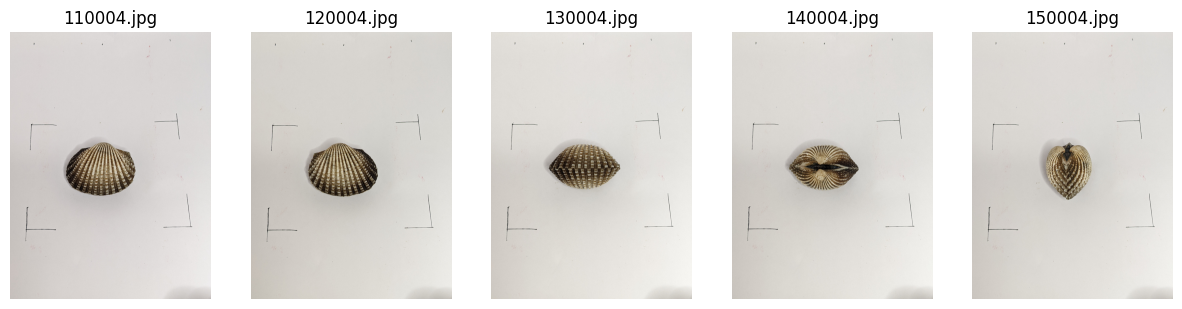

In [ ]:
# MALE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get a list of image files in the male_litob folder
image_files = [f for f in os.listdir(male_litob) if os.path.isfile(os.path.join(male_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display the first 5 images
num_images_to_show = min(5, len(image_files))

plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
  img_path = os.path.join(male_litob, image_files[i])
  img = mpimg.imread(img_path)
  plt.subplot(1, num_images_to_show, i + 1)
  plt.imshow(img)
  plt.title(image_files[i])
  plt.axis('off')

plt.show()

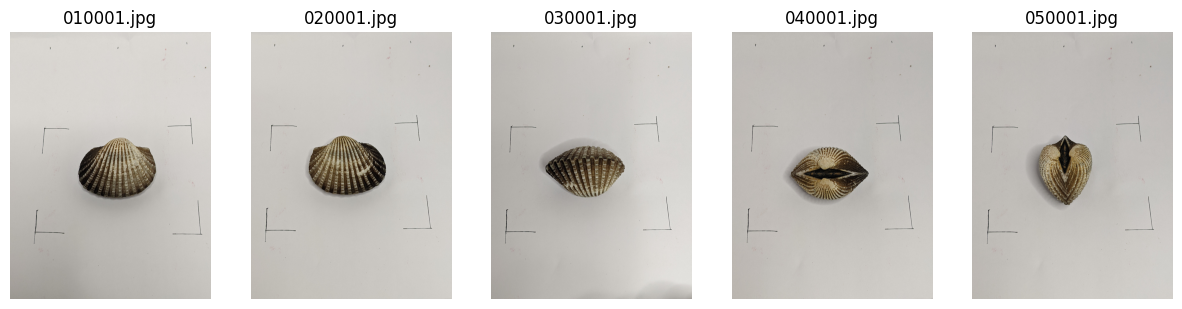

In [ ]:
# FEMALE
# Get a list of image files in the female_litob folder
image_files = [f for f in os.listdir(female_litob) if os.path.isfile(os.path.join(female_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display the first 5 images
num_images_to_show = min(5, len(image_files))

plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
  img_path = os.path.join(female_litob, image_files[i])
  img = mpimg.imread(img_path)
  plt.subplot(1, num_images_to_show, i + 1)
  plt.imshow(img)
  plt.title(image_files[i])
  plt.axis('off')

plt.show()

In [ ]:
# MALE
import cv2
import os

input_male = "/content/drive/My Drive/SP 2024/Male-Litob"
output_male = "/content/drive/My Drive/SP 2024/Male-Dimensions"

os.makedirs(output_male, exist_ok=True)

def resize_with_aspect_ratio(image, target_width, target_height):
    """Resizes an image to fit within the target dimensions without distortion."""
    h, w = image.shape[:2]
    aspect_ratio = w / h

    # Determine the new size while preserving aspect ratio
    if w > h:
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_male) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No images found in the input directory.")
else:
    # Read the first image to determine target dimensions
    first_image_path = os.path.join(input_male, image_files[0])
    first_image = cv2.imread(first_image_path)

    if first_image is None:
        print(f"Error loading the first image: {first_image_path}")
    else:
        # Get target dimensions from the first image
        target_h, target_w = first_image.shape[:2]

        for img_name in image_files:
            img_path = os.path.join(input_male, img_name)
            output_path = os.path.join(output_male, img_name)

            # Read the image
            image = cv2.imread(img_path)
            if image is None:
                print(f"Skipping invalid image: {img_path}")
                continue

            # Resize while maintaining aspect ratio
            resized_image = resize_with_aspect_ratio(image, target_w, target_h)

            # Save the resized image
            cv2.imwrite(output_path, resized_image)

        print(f"Processing complete. Resized images saved to: {output_male}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/Male-Dimensions


In [ ]:
# FEMALE
import cv2
import os

input_female = "/content/drive/My Drive/SP 2024/Female-Litob"
output_female = "/content/drive/My Drive/SP 2024/Female-Dimensions"

os.makedirs(output_female, exist_ok=True)

def resize_with_aspect_ratio(image, target_width, target_height):
    """Resizes an image to fit within the target dimensions without distortion."""
    h, w = image.shape[:2]
    aspect_ratio = w / h

    # Determine the new size while preserving aspect ratio
    if w > h:
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_female) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No images found in the input directory.")
else:
    # Read the first image to determine target dimensions
    first_image_path = os.path.join(input_female, image_files[0])
    first_image = cv2.imread(first_image_path)

    if first_image is None:
        print(f"Error loading the first image: {first_image_path}")
    else:
        # Get target dimensions from the first image
        target_h, target_w = first_image.shape[:2]

        for img_name in image_files:
            img_path = os.path.join(input_female, img_name)
            output_path = os.path.join(output_female, img_name)

            # Read the image
            image = cv2.imread(img_path)
            if image is None:
                print(f"Skipping invalid image: {img_path}")
                continue

            # Resize while maintaining aspect ratio
            resized_image = resize_with_aspect_ratio(image, target_w, target_h)

            # Save the resized image
            cv2.imwrite(output_path, resized_image)

        print(f"Processing complete. Resized images saved to: {output_female}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/Female-Dimensions


## Removing Background

In [ ]:
!pip install rembg onnxruntime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
# MALE
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove

sample_path = "/content/drive/My Drive/SP 2024/Male-Litob"
out_path = "/content/drive/My Drive/SP 2024/sample/processed"

os.makedirs(out_path, exist_ok=True)

# Process all images in the folder
for filename in os.listdir(sample_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        input_path = os.path.join(sample_path, filename)
        output_path = os.path.join(out_path, filename.split('.')[0] + '.png')

        # Read image using OpenCV
        image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

        if image is None:
            print(f"Error: Could not read image from {input_path}")
            continue  # Skip this image

        # Convert image from BGR to RGB (rembg expects RGB format)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Remove background (returns an RGBA image)
        output_image = remove(image_rgb)

        # Convert to OpenCV format (RGBA)
        output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2RGBA)

        # Find bounding box of non-transparent pixels
        alpha_channel = output_image[:, :, 3]  # Alpha channel (transparency)
        coords = cv2.findNonZero(alpha_channel)  # Find non-zero alpha pixels

        if coords is None:
            print(f"Error: No foreground detected in {filename}")
            continue

        # Get bounding box of the detected foreground
        x, y, w, h = cv2.boundingRect(coords)

        # Crop the image based on detected foreground
        cropped_image = output_image[y:y+h, x:x+w]

        # Define new canvas size (square, slightly larger than cropped image)
        new_size = max(w, h) + 20  # Add padding
        white_bg = np.ones((new_size, new_size, 4), dtype=np.uint8) * 255  # White background with alpha

        # Compute center position
        x_offset = (new_size - w) // 2
        y_offset = (new_size - h) // 2

        # Overlay the cropped image onto the white background with transparency intact
        white_bg[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

        # Create a white background without alpha channel (just RGB)
        white_bg_rgb = np.ones((new_size, new_size, 3), dtype=np.uint8) * 255  # White background without alpha

        # Use the alpha channel to blend the image with the white background
        alpha = white_bg[:, :, 3] / 255.0  # Normalize alpha channel
        for c in range(3):  # Apply blending for R, G, B channels
            white_bg_rgb[:, :, c] = (1 - alpha) * white_bg_rgb[:, :, c] + alpha * white_bg[:, :, c]

        # Convert back to BGR for saving
        final_image = cv2.cvtColor(white_bg_rgb, cv2.COLOR_RGB2BGR)

        # Save the final image with a white background
        cv2.imwrite(output_path, final_image)

        # # Show the result
        # plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
        # plt.axis("off")
        # plt.show()

print("Processing Complete")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 194GB/s]


Processing Complete


In [ ]:
# FEMALE
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from rembg import remove

sample_path = "/content/drive/My Drive/SP 2024/Female-Litob"
out_path = "/content/drive/My Drive/SP 2024/sample/processed-female"

os.makedirs(out_path, exist_ok=True)

# Process all images in the folder
for filename in os.listdir(sample_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        input_path = os.path.join(sample_path, filename)
        output_path = os.path.join(out_path, filename.split('.')[0] + '.png')

        # Read image using OpenCV
        image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

        if image is None:
            print(f"Error: Could not read image from {input_path}")
            continue  # Skip this image

        # Convert image from BGR to RGB (rembg expects RGB format)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Remove background (returns an RGBA image)
        output_image = remove(image_rgb)

        # Convert to OpenCV format (RGBA)
        output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2RGBA)

        # Find bounding box of non-transparent pixels
        alpha_channel = output_image[:, :, 3]  # Alpha channel (transparency)
        coords = cv2.findNonZero(alpha_channel)  # Find non-zero alpha pixels

        if coords is None:
            print(f"Error: No foreground detected in {filename}")
            continue

        # Get bounding box of the detected foreground
        x, y, w, h = cv2.boundingRect(coords)

        # Crop the image based on detected foreground
        cropped_image = output_image[y:y+h, x:x+w]

        # Define new canvas size (square, slightly larger than cropped image)
        new_size = max(w, h) + 20  # Add padding
        white_bg = np.ones((new_size, new_size, 4), dtype=np.uint8) * 255  # White background with alpha

        # Compute center position
        x_offset = (new_size - w) // 2
        y_offset = (new_size - h) // 2

        # Overlay the cropped image onto the white background with transparency intact
        white_bg[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

        # Create a white background without alpha channel (just RGB)
        white_bg_rgb = np.ones((new_size, new_size, 3), dtype=np.uint8) * 255  # White background without alpha

        # Use the alpha channel to blend the image with the white background
        alpha = white_bg[:, :, 3] / 255.0  # Normalize alpha channel
        for c in range(3):  # Apply blending for R, G, B channels
            white_bg_rgb[:, :, c] = (1 - alpha) * white_bg_rgb[:, :, c] + alpha * white_bg[:, :, c]

        # Convert back to BGR for saving
        final_image = cv2.cvtColor(white_bg_rgb, cv2.COLOR_RGB2BGR)

        # Save the final image with a white background
        cv2.imwrite(output_path, final_image)

        # # Show the result
        # plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
        # plt.axis("off")
        # plt.show()

print("Processing Complete")

Processing Complete


## Same Dimensions

In [ ]:
# MALE
import cv2
import os

input_male = "/content/drive/My Drive/SP 2024/sample/processed"
output_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions"

os.makedirs(output_male, exist_ok=True)

def resize_with_aspect_ratio(image, target_width, target_height):
    """Resizes an image to fit within the target dimensions without distortion."""
    h, w = image.shape[:2]
    aspect_ratio = w / h

    # Determine the new size while preserving aspect ratio
    if w > h:
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = target_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_male) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No images found in the input directory.")
else:
    # Read the first image to determine target dimensions
    first_image_path = os.path.join(input_male, image_files[0])
    first_image = cv2.imread(first_image_path)

    if first_image is None:
        print(f"Error loading the first image: {first_image_path}")
    else:
        # Get target dimensions from the first image
        target_h, target_w = first_image.shape[:2]

        for img_name in image_files:
            img_path = os.path.join(input_male, img_name)
            output_path = os.path.join(output_male, img_name)

            # Read the image
            image = cv2.imread(img_path)
            if image is None:
                print(f"Skipping invalid image: {img_path}")
                continue

            # Resize while maintaining aspect ratio
            resized_image = resize_with_aspect_ratio(image, target_w, target_h)

            # Save the resized image
            cv2.imwrite(output_path, resized_image)

        print(f"Processing complete. Resized images saved to: {output_male}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Male-Dimensions


In [ ]:
# FEMALE
import cv2
import os

input_female = "/content/drive/My Drive/SP 2024/sample/processed-female"
output_female = "/content/drive/My Drive/SP 2024/sample/Female-Dimensions"

os.makedirs(output_female, exist_ok=True)

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_female) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No images found in the input directory.")
else:
    for img_name in image_files:
        img_path = os.path.join(input_female, img_name)
        output_path = os.path.join(output_female, img_name)

        # Read the image
        image = cv2.imread(img_path)
        if image is None:
            print(f"Skipping invalid image: {img_path}")
            continue

        # Resize to 512x512 using INTER_AREA for downscaling
        resized_image = cv2.resize(image, (1130, 1130), interpolation=cv2.INTER_AREA)

        # Save the resized image
        cv2.imwrite(output_path, resized_image)

    print(f"Processing complete. Resized images saved to: {output_female}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Female-Dimensions


## Same Dimensions with 256x256 pixels

In [ ]:
# MALE
import cv2
import os
import numpy as np

input_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions"
output_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions-256"

os.makedirs(output_male, exist_ok=True)

def resize_and_pad(image, target_size):
    """Resizes an image to fit within the target size while maintaining aspect ratio
    and adds padding to create a square image."""

    height, width = image.shape[:2]

    # Determine scaling factors
    if height > width:
        scale_factor = target_size / height
        new_width = int(width * scale_factor)
        new_height = target_size
    else:
        scale_factor = target_size / width
        new_height = int(height * scale_factor)
        new_width = target_size

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Create a blank square canvas with the target size
    canvas = np.zeros((target_size, target_size, 3), dtype=np.uint8)  # Assuming 3 color channels (BGR)
    canvas.fill(255)  # Fill with white

    # Calculate offsets to center the resized image on the canvas
    x_offset = (target_size - new_width) // 2
    y_offset = (target_size - new_height) // 2

    # Paste the resized image onto the canvas
    canvas[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return canvas

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_male) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(input_male, img_name)
    output_path = os.path.join(output_male, img_name)

    # Read the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping invalid image: {img_path}")
        continue

    # Resize and pad the image to 256x256
    resized_image = resize_and_pad(image, 256)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

print(f"Processing complete. Resized images saved to: {output_male}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Male-Dimensions-256


In [ ]:
# FEMALE
import cv2
import os
import numpy as np

input_female = "/content/drive/My Drive/SP 2024/sample/Female-Dimensions"
output_female = "/content/drive/My Drive/SP 2024/sample/Female-Dimensions-256"

os.makedirs(output_female, exist_ok=True)

def resize_and_pad(image, target_size):
    """Resizes an image to fit within the target size while maintaining aspect ratio
    and adds padding to create a square image."""

    height, width = image.shape[:2]

    # Determine scaling factors
    if height > width:
        scale_factor = target_size / height
        new_width = int(width * scale_factor)
        new_height = target_size
    else:
        scale_factor = target_size / width
        new_height = int(height * scale_factor)
        new_width = target_size

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Create a blank square canvas with the target size
    canvas = np.zeros((target_size, target_size, 3), dtype=np.uint8)  # Assuming 3 color channels (BGR)
    canvas.fill(255)  # Fill with white

    # Calculate offsets to center the resized image on the canvas
    x_offset = (target_size - new_width) // 2
    y_offset = (target_size - new_height) // 2

    # Paste the resized image onto the canvas
    canvas[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return canvas

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_female) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(input_female, img_name)
    output_path = os.path.join(output_female, img_name)

    # Read the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping invalid image: {img_path}")
        continue

    # Resize and pad the image to 256x256
    resized_image = resize_and_pad(image, 256)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

print(f"Processing complete. Resized images saved to: {output_female}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Female-Dimensions-256


### Removing Shadows

In [ ]:
import os
import cv2 as cv
import numpy as np

def process_images(input_folder, output_folder):

    # Ensure output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Adjusted HSV Threshold values
    low_H, low_S, low_V = 0, 30, 10
    high_H, high_S, high_V = 255, 255, 255

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Read image
            frame = cv.imread(input_path)
            if frame is None:
                print(f"Error reading {filename}")
                continue

            # Convert to HSV and apply threshold
            frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
            frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))

            # Filling holes
            im_floodfill = frame_threshold.copy()
            h, w = frame_threshold.shape[:2]
            mask = np.zeros((h+2, w+2), np.uint8)
            cv.floodFill(im_floodfill, mask, (0, 0), 255)
            im_floodfill_inv = cv.bitwise_not(im_floodfill)
            mask = frame_threshold | im_floodfill_inv

            # Apply morphological operations
            kernel = np.ones((3, 3), np.uint8)
            mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2)
            mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=4)

            # Find contours
            contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

            if contours:
                # Merge contours using convex hull
                hull = cv.convexHull(np.vstack(contours))

                # Create a mask for the shell
                shell_mask = np.zeros_like(frame)
                cv.drawContours(shell_mask, [hull], -1, (255, 255, 255), -1)

                # Create a white background
                white_background = np.ones_like(frame) * 255

                # Combine the shell with the white background
                result = np.where(shell_mask == 255, frame, white_background)
            else:
                result = frame  # If no contour is found, return the original image

            # Save the processed image
            cv.imwrite(output_path, result)
            print(f"Processed and saved: {output_path}")

    print(f"Processing complete for {input_folder}")

male_input_folder = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions-256"
male_output_folder = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_input_folder = "/content/drive/My Drive/SP 2024/sample/Female-Dimensions-256"
female_output_folder = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"

# Process male images
process_images(male_input_folder, male_output_folder)

# Process female images
process_images(female_input_folder, female_output_folder)

Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/160004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/130004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/140004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/150004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/120004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/110004.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/140005.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/110006.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/120006.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows/120005.png
Processed and saved: /content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows

### Front view/Dorsal Grayscale

In [ ]:
import os
import cv2 as cv
import numpy as np

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Dorsal_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Dorsal_View_Grayscale/Female"

os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):  # Add output_dir parameter
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "11", output_dir_male)

  # Process female images
process_images(female_litob, "01", output_dir_female)


Processed and saved: 110067.png
Processed and saved: 110068.png
Processed and saved: 110069.png
Processed and saved: 110070.png
Processed and saved: 110071.png
Processed and saved: 110072.png
Processed and saved: 110073.png
Processed and saved: 110074.png
Processed and saved: 110143.png
Processed and saved: 110144.png
Processed and saved: 110145.png
Processed and saved: 110146.png
Processed and saved: 110147.png
Processed and saved: 110148.png
Processed and saved: 110149.png
Processed and saved: 110150.png
Processed and saved: 110151.png
Processed and saved: 110152.png
Processed and saved: 110153.png
Processed and saved: 110154.png
Processed and saved: 110155.png
Processed and saved: 110156.png
Processed and saved: 110157.png
Processed and saved: 110158.png
Processed and saved: 110159.png
Processed and saved: 110160.png
Processed and saved: 110161.png
Processed and saved: 110162.png
Processed and saved: 110163.png
Processed and saved: 110164.png
Processed and saved: 110165.png
Processe

### Ventral View Grayscale

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Ventral_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Ventral_View_Grayscale/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "12", output_dir_male)

# Process female images
process_images(female_litob, "02", output_dir_female)

Processed and saved: 120067.png
Processed and saved: 120068.png
Processed and saved: 120069.png
Processed and saved: 120070.png
Processed and saved: 120071.png
Processed and saved: 120072.png
Processed and saved: 120073.png
Processed and saved: 120074.png
Processed and saved: 120143.png
Processed and saved: 120144.png
Processed and saved: 120145.png
Processed and saved: 120146.png
Processed and saved: 120147.png
Processed and saved: 120148.png
Processed and saved: 120149.png
Processed and saved: 120150.png
Processed and saved: 120151.png
Processed and saved: 120152.png
Processed and saved: 120153.png
Processed and saved: 120154.png
Processed and saved: 120155.png
Processed and saved: 120156.png
Processed and saved: 120157.png
Processed and saved: 120158.png
Processed and saved: 120159.png
Processed and saved: 120160.png
Processed and saved: 120161.png
Processed and saved: 120162.png
Processed and saved: 120163.png
Processed and saved: 120164.png
Processed and saved: 120165.png
Processe

### Anterior View Grayscale

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Anterior_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Anterior_View_Grayscale/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "13", output_dir_male)

# Process female images
process_images(female_litob, "03", output_dir_female)

Processed and saved: 130067.png
Processed and saved: 130068.png
Processed and saved: 130069.png
Processed and saved: 130070.png
Processed and saved: 130071.png
Processed and saved: 130072.png
Processed and saved: 130073.png
Processed and saved: 130074.png
Processed and saved: 130143.png
Processed and saved: 130144.png
Processed and saved: 130145.png
Processed and saved: 130146.png
Processed and saved: 130147.png
Processed and saved: 130148.png
Processed and saved: 130149.png
Processed and saved: 130150.png
Processed and saved: 130151.png
Processed and saved: 130152.png
Processed and saved: 130153.png
Processed and saved: 130154.png
Processed and saved: 130155.png
Processed and saved: 130156.png
Processed and saved: 130157.png
Processed and saved: 130158.png
Processed and saved: 130159.png
Processed and saved: 130160.png
Processed and saved: 130161.png
Processed and saved: 130162.png
Processed and saved: 130163.png
Processed and saved: 130164.png
Processed and saved: 130165.png
Processe

### Posterior View Grayscale

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Posterior_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Posterior_View_Grayscale/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "14", output_dir_male)

# Process female images
process_images(female_litob, "04", output_dir_female)

Processed and saved: 140067.png
Processed and saved: 140068.png
Processed and saved: 140069.png
Processed and saved: 140070.png
Processed and saved: 140071.png
Processed and saved: 140072.png
Processed and saved: 140073.png
Processed and saved: 140074.png
Processed and saved: 140143.png
Processed and saved: 140144.png
Processed and saved: 140146.png
Processed and saved: 140145.png
Processed and saved: 140147.png
Processed and saved: 140148.png
Processed and saved: 140149.png
Processed and saved: 140150.png
Processed and saved: 140151.png
Processed and saved: 140152.png
Processed and saved: 140153.png
Processed and saved: 140154.png
Processed and saved: 140155.png
Processed and saved: 140156.png
Processed and saved: 140157.png
Processed and saved: 140158.png
Processed and saved: 140159.png
Processed and saved: 140160.png
Processed and saved: 140161.png
Processed and saved: 140162.png
Processed and saved: 140163.png
Processed and saved: 140164.png
Processed and saved: 140165.png
Processe

### Left Lateral View Grayscale

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Left_Lateral_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Left_Lateral_View_Grayscale/Female"

os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "15", output_dir_male)

# Process female images
process_images(female_litob, "05", output_dir_female)


Processed and saved: 150066.png
Processed and saved: 150067.png
Processed and saved: 150068.png
Processed and saved: 150069.png
Processed and saved: 150070.png
Processed and saved: 150071.png
Processed and saved: 150072.png
Processed and saved: 150073.png
Processed and saved: 150074.png
Processed and saved: 150143.png
Processed and saved: 150144.png
Processed and saved: 150145.png
Processed and saved: 150146.png
Processed and saved: 150147.png
Processed and saved: 150148.png
Processed and saved: 150149.png
Processed and saved: 150150.png
Processed and saved: 150151.png
Processed and saved: 150152.png
Processed and saved: 150153.png
Processed and saved: 150154.png
Processed and saved: 150155.png
Processed and saved: 150156.png
Processed and saved: 150157.png
Processed and saved: 150158.png
Processed and saved: 150159.png
Processed and saved: 150160.png
Processed and saved: 150161.png
Processed and saved: 150162.png
Processed and saved: 150163.png
Processed and saved: 150164.png
Processe

### Right Lateral View Grayscale

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Right_Lateral_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Grayscale/Right_Lateral_View_Grayscale/Female"

os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "16", output_dir_male)

# Process female images
process_images(female_litob, "06", output_dir_female)

Processed and saved: 160066.png
Processed and saved: 160067.png
Processed and saved: 160068.png
Processed and saved: 160069.png
Processed and saved: 160070.png
Processed and saved: 160071.png
Processed and saved: 160072.png
Processed and saved: 160073.png
Processed and saved: 160074.png
Processed and saved: 160143.png
Processed and saved: 160144.png
Processed and saved: 160145.png
Processed and saved: 160147.png
Processed and saved: 160146.png
Processed and saved: 160148.png
Processed and saved: 160149.png
Processed and saved: 160150.png
Processed and saved: 160151.png
Processed and saved: 160152.png
Processed and saved: 160153.png
Processed and saved: 160154.png
Processed and saved: 160155.png
Processed and saved: 160156.png
Processed and saved: 160157.png
Processed and saved: 160158.png
Processed and saved: 160159.png
Processed and saved: 160160.png
Processed and saved: 160161.png
Processed and saved: 160162.png
Processed and saved: 160163.png
Processed and saved: 160164.png
Processe

### Dorsal View 256

In [ ]:
import cv2
import os

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Dorsal_View/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Dorsal_View/Female"

# Create the output directories if they don't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
    """Processes images while keeping their original color."""
    for filename in os.listdir(directory):
        if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            try:
                # Read the image in color mode (default)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                # If image is not successfully read, skip the file
                if img is None:
                    print(f"Error reading image: {img_path}")
                    continue

                # Construct output path
                output_path = os.path.join(output_dir, filename)

                # Save the image (keeping color)
                cv2.imwrite(output_path, img)
                #print(f"Processed and saved: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "11", output_dir_male)

# Process female images
process_images(female_litob, "01", output_dir_female)


### Ventral View 256

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Ventral_View_Grayscale/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Ventral_View_Grayscale/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "12", output_dir_male)

# Process female images
process_images(female_litob, "02", output_dir_female)

Processed and saved: 120067.png
Processed and saved: 120068.png
Processed and saved: 120069.png
Processed and saved: 120070.png
Processed and saved: 120071.png
Processed and saved: 120072.png
Processed and saved: 120073.png
Processed and saved: 120074.png
Processed and saved: 120143.png
Processed and saved: 120144.png
Processed and saved: 120145.png
Processed and saved: 120146.png
Processed and saved: 120147.png
Processed and saved: 120148.png
Processed and saved: 120149.png
Processed and saved: 120150.png
Processed and saved: 120151.png
Processed and saved: 120152.png
Processed and saved: 120153.png
Processed and saved: 120154.png
Processed and saved: 120155.png
Processed and saved: 120156.png
Processed and saved: 120157.png
Processed and saved: 120158.png
Processed and saved: 120159.png
Processed and saved: 120160.png
Processed and saved: 120161.png
Processed and saved: 120162.png
Processed and saved: 120163.png
Processed and saved: 120164.png
Processed and saved: 120165.png
Processe

### Anterior View 256

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Anterior_View_Colored/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Anterior_View_Colored/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "13", output_dir_male)

# Process female images
process_images(female_litob, "03", output_dir_female)

Processed and saved: 130067.png
Processed and saved: 130068.png
Processed and saved: 130069.png
Processed and saved: 130070.png
Processed and saved: 130071.png
Processed and saved: 130072.png
Processed and saved: 130073.png
Processed and saved: 130074.png
Processed and saved: 130143.png
Processed and saved: 130144.png
Processed and saved: 130145.png
Processed and saved: 130146.png
Processed and saved: 130147.png
Processed and saved: 130148.png
Processed and saved: 130149.png
Processed and saved: 130150.png
Processed and saved: 130151.png
Processed and saved: 130152.png
Processed and saved: 130153.png
Processed and saved: 130154.png
Processed and saved: 130155.png
Processed and saved: 130156.png
Processed and saved: 130157.png
Processed and saved: 130158.png
Processed and saved: 130159.png
Processed and saved: 130160.png
Processed and saved: 130161.png
Processed and saved: 130162.png
Processed and saved: 130163.png
Processed and saved: 130164.png
Processed and saved: 130165.png
Processe

### Posterior View 256

In [ ]:
import cv2
import os

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Posterior_View_Colored/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Posterior_View_Colored/Female"

# Create the output directories if they don't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
    """Processes images while keeping their original color."""
    for filename in os.listdir(directory):
        if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            try:
                # Read the image in color mode (default)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                # If image is not successfully read, skip the file
                if img is None:
                    print(f"Error reading image: {img_path}")
                    continue

                # Construct output path
                output_path = os.path.join(output_dir, filename)

                # Save the image (keeping color)
                cv2.imwrite(output_path, img)
                #print(f"Processed and saved: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "14", output_dir_male)

# Process female images
process_images(female_litob, "04", output_dir_female)

### Left Lateral View 256

In [ ]:
import os
import cv2

# Define paths
male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "15", output_dir_male)

  # Process female images
process_images(female_litob, "05", output_dir_female)

Processed and saved: 150066.png
Processed and saved: 150067.png
Processed and saved: 150068.png
Processed and saved: 150069.png
Processed and saved: 150070.png
Processed and saved: 150071.png
Processed and saved: 150072.png
Processed and saved: 150073.png
Processed and saved: 150074.png
Processed and saved: 150143.png
Processed and saved: 150144.png
Processed and saved: 150145.png
Processed and saved: 150146.png
Processed and saved: 150147.png
Processed and saved: 150148.png
Processed and saved: 150149.png
Processed and saved: 150150.png
Processed and saved: 150151.png
Processed and saved: 150152.png
Processed and saved: 150153.png
Processed and saved: 150154.png
Processed and saved: 150155.png
Processed and saved: 150156.png
Processed and saved: 150157.png
Processed and saved: 150158.png
Processed and saved: 150159.png
Processed and saved: 150160.png
Processed and saved: 150161.png
Processed and saved: 150162.png
Processed and saved: 150163.png
Processed and saved: 150164.png
Processe

### Right Lateral 256

In [ ]:
import os
import cv2

male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
output_dir_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Male"
output_dir_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Female"

# Create the output directory if it doesn't exist
os.makedirs(output_dir_male, exist_ok=True)
os.makedirs(output_dir_female, exist_ok=True)

def process_images(directory, prefix, output_dir):
       for filename in os.listdir(directory):
           if filename.startswith(prefix) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
               img_path = os.path.join(directory, filename)
               try:
                   # Read the image using OpenCV
                   img = cv2.imread(img_path, cv2.IMREAD_COLOR)

                   # If image is not successfully read, skip the file.
                   if img is None:
                       print(f"Error reading image: {img_path}")
                       continue

                   # Construct output path using the provided output_dir
                   output_path = os.path.join(output_dir, filename)

                   # Save the grayscale image
                   cv2.imwrite(output_path, img)
                   print(f"Processed and saved: {filename}")
               except Exception as e:
                   print(f"Error processing {filename}: {e}")

# Process male images
process_images(male_litob, "16", output_dir_male)

# Process female images
process_images(female_litob, "06", output_dir_female)

Processed and saved: 160066.png
Processed and saved: 160067.png
Processed and saved: 160068.png
Processed and saved: 160069.png
Processed and saved: 160070.png
Processed and saved: 160071.png
Processed and saved: 160072.png
Processed and saved: 160073.png
Processed and saved: 160074.png
Processed and saved: 160143.png
Processed and saved: 160144.png
Processed and saved: 160145.png
Processed and saved: 160147.png
Processed and saved: 160146.png
Processed and saved: 160148.png
Processed and saved: 160149.png
Processed and saved: 160150.png
Processed and saved: 160151.png
Processed and saved: 160152.png
Processed and saved: 160153.png
Processed and saved: 160154.png
Processed and saved: 160155.png
Processed and saved: 160156.png
Processed and saved: 160157.png
Processed and saved: 160158.png
Processed and saved: 160159.png
Processed and saved: 160160.png
Processed and saved: 160161.png
Processed and saved: 160162.png
Processed and saved: 160163.png
Processed and saved: 160164.png
Processe

# 32x32 pixels

In [ ]:
import cv2
import os
import numpy as np

# input_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions-256-gray"
# output_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions-32"

input_male = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
output_male = "/content/drive/My Drive/SP 2024/sample/Male-Dimensions-32"

os.makedirs(output_male, exist_ok=True)

def resize_and_pad(image, target_size):
    height, width = image.shape[:2]

    # Determine scaling factors
    if height > width:
        scale_factor = target_size / height
        new_width = int(width * scale_factor)
        new_height = target_size
    else:
        scale_factor = target_size / width
        new_height = int(height * scale_factor)
        new_width = target_size

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Create a blank square canvas with the target size
    canvas = np.zeros((target_size, target_size, 3), dtype=np.uint8)  # Assuming 3 color channels (BGR)
    canvas.fill(255)  # Fill with white

    # Calculate offsets to center the resized image on the canvas
    x_offset = (target_size - new_width) // 2
    y_offset = (target_size - new_height) // 2

    # Paste the resized image onto the canvas
    canvas[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return canvas

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_male) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(input_male, img_name)
    output_path = os.path.join(output_male, img_name)

    # Read the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping invalid image: {img_path}")
        continue

    # Resize and pad the image to 256x256
    resized_image = resize_and_pad(image, 32)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

print(f"Processing complete. Resized images saved to: {output_male}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Male-Dimensions-32


In [ ]:
import cv2
import os
import numpy as np

input_female = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"
output_female = "/content/drive/My Drive/SP 2024/sample/Female-Dimensions-32"

os.makedirs(output_female, exist_ok=True)

def resize_and_pad(image, target_size):
    height, width = image.shape[:2]

    # Determine scaling factors
    if height > width:
        scale_factor = target_size / height
        new_width = int(width * scale_factor)
        new_height = target_size
    else:
        scale_factor = target_size / width
        new_height = int(height * scale_factor)
        new_width = target_size

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Create a blank square canvas with the target size
    canvas = np.zeros((target_size, target_size, 3), dtype=np.uint8)  # Assuming 3 color channels (BGR)
    canvas.fill(255)  # Fill with white

    # Calculate offsets to center the resized image on the canvas
    x_offset = (target_size - new_width) // 2
    y_offset = (target_size - new_height) // 2

    # Paste the resized image onto the canvas
    canvas[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image

    return canvas

# Get all image filenames in the input directory
image_files = [f for f in os.listdir(input_female) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(input_female, img_name)
    output_path = os.path.join(output_female, img_name)

    # Read the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping invalid image: {img_path}")
        continue

    # Resize and pad the image to 256x256
    resized_image = resize_and_pad(image, 32)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

print(f"Processing complete. Resized images saved to: {output_female}")

Processing complete. Resized images saved to: /content/drive/My Drive/SP 2024/sample/Female-Dimensions-32


### Data Augmentation (45 and 90 Rotation)

In [ ]:
import cv2
import os
import numpy as np

def rotate_and_save(input_folder, output_folder, angle):
    os.makedirs(output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                rows, cols = img.shape[:2]
                M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
                rotated_img = cv2.warpAffine(img, M, (cols, rows))
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, rotated_img)

# Base directory for data augmentation
base_output_dir = "/content/drive/My Drive/SP 2024/Data Augmentation"

# Create directories for 45 degrees
combined_folder_45 = os.path.join(base_output_dir, "Male-Female-45")
os.makedirs(combined_folder_45, exist_ok=True)

male_output_folder_45 = os.path.join(combined_folder_45, "Male-Rotated-45")
female_output_folder_45 = os.path.join(combined_folder_45, "Female-Rotated-45")

# Create directories for 90 degrees
combined_folder_90 = os.path.join(base_output_dir, "Male-Female-90")
os.makedirs(combined_folder_90, exist_ok=True)

male_output_folder_90 = os.path.join(combined_folder_90, "Male-Rotated-90")
female_output_folder_90 = os.path.join(combined_folder_90, "Female-Rotated-90")

# Male image rotation
male_input_folder = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
rotate_and_save(male_input_folder, male_output_folder_45, 45)
rotate_and_save(male_input_folder, male_output_folder_90, 90)

# Female image rotation
female_input_folder = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"
rotate_and_save(female_input_folder, female_output_folder_45, 45)
rotate_and_save(female_input_folder, female_output_folder_90, 90)

print("Image rotation complete. Rotated images saved in the following folders:")
print(f"- {combined_folder_45}")
print(f"- {combined_folder_90}")


Image rotation complete. Rotated images saved in the following folders:
- /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-45
- /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-90


### Data Augmentation (45 and 90 Rotation) Left Lateral

In [ ]:
import cv2
import os
import numpy as np

def rotate_with_white_bg(input_folder, output_folder, angle):
    os.makedirs(output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                rows, cols = img.shape[:2]

                # Modify filename based on angle
                base_name, ext = os.path.splitext(filename)
                if angle == 45:
                    new_filename = f"{base_name}_45{ext}"
                elif angle == 90:
                    new_filename = f"{base_name}_90{ext}"
                else:
                    new_filename = filename

                output_path = os.path.join(output_folder, new_filename)

                # Check if file already exists
                if os.path.exists(output_path):
                    print(f"Skipping {new_filename} - file already exists")
                    continue

                # Perform rotation with white background
                M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
                rotated_img = cv2.warpAffine(img, M, (cols, rows), borderValue=(255, 255, 255))

                # Save the rotated image
                cv2.imwrite(output_path, rotated_img)
                print(f"Created {new_filename}")

# Base directory for data augmentation
base_output_dir = "/content/drive/My Drive/SP 2024/Data Augmentation"

# Create directories for 45 degrees
combined_folder_45 = os.path.join(base_output_dir, "Male-Female-L-Lateral-45")
os.makedirs(combined_folder_45, exist_ok=True)

male_output_folder_45 = os.path.join(combined_folder_45, "Male-L-Lateral-45")
female_output_folder_45 = os.path.join(combined_folder_45, "Female-L-Lateral-45")

# Create directories for 90 degrees
combined_folder_90 = os.path.join(base_output_dir, "Male-Female-L-Lateral-90")
os.makedirs(combined_folder_90, exist_ok=True)

male_output_folder_90 = os.path.join(combined_folder_90, "Male-L-Lateral-90")
female_output_folder_90 = os.path.join(combined_folder_90, "Female-L-Lateral-90")

# Male image rotation
male_input_folder = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
rotate_with_white_bg(male_input_folder, male_output_folder_45, 45)
rotate_with_white_bg(male_input_folder, male_output_folder_90, 90)

# Female image rotation
female_input_folder = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"
rotate_with_white_bg(female_input_folder, female_output_folder_45, 45)
rotate_with_white_bg(female_input_folder, female_output_folder_90, 90)

print("Image rotation complete. Images rotated with white background saved in:")
print(f"- {combined_folder_45}")
print(f"- {combined_folder_90}")

Skipping 150066_45.png - file already exists
Skipping 150067_45.png - file already exists
Skipping 150068_45.png - file already exists
Skipping 150069_45.png - file already exists
Skipping 150070_45.png - file already exists
Skipping 150071_45.png - file already exists
Skipping 150072_45.png - file already exists
Skipping 150073_45.png - file already exists
Skipping 150074_45.png - file already exists
Skipping 150143_45.png - file already exists
Skipping 150144_45.png - file already exists
Skipping 150145_45.png - file already exists
Skipping 150146_45.png - file already exists
Skipping 150147_45.png - file already exists
Skipping 150148_45.png - file already exists
Skipping 150149_45.png - file already exists
Skipping 150150_45.png - file already exists
Skipping 150151_45.png - file already exists
Skipping 150152_45.png - file already exists
Skipping 150153_45.png - file already exists
Skipping 150154_45.png - file already exists
Skipping 150155_45.png - file already exists
Skipping 1

### Data Augmentation (45 and 90 Rotation) Right Lateral

In [ ]:
import cv2
import os
import numpy as np

def rotate_with_white_bg(input_folder, output_folder, angle):
    os.makedirs(output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                rows, cols = img.shape[:2]

                # Modify filename based on angle
                base_name, ext = os.path.splitext(filename)
                if angle == 45:
                    new_filename = f"{base_name}_45{ext}"
                elif angle == 90:
                    new_filename = f"{base_name}_90{ext}"
                else:
                    new_filename = filename

                output_path = os.path.join(output_folder, new_filename)

                # Check if file already exists
                if os.path.exists(output_path):
                    print(f"Skipping {new_filename} - file already exists")
                    continue

                # Perform rotation with white background
                M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
                rotated_img = cv2.warpAffine(img, M, (cols, rows), borderValue=(255, 255, 255))

                # Save the rotated image
                cv2.imwrite(output_path, rotated_img)
                print(f"Created {new_filename}")

# Base directory for data augmentation
base_output_dir = "/content/drive/My Drive/SP 2024/Data Augmentation"

# Create directories for 45 degrees
combined_folder_45 = os.path.join(base_output_dir, "Male-Female-R-Lateral-45")
os.makedirs(combined_folder_45, exist_ok=True)

male_output_folder_45 = os.path.join(combined_folder_45, "Male-R-Lateral-45")
female_output_folder_45 = os.path.join(combined_folder_45, "Female-R-Lateral-45")

# Create directories for 90 degrees
combined_folder_90 = os.path.join(base_output_dir, "Male-Female-R-Lateral-90")
os.makedirs(combined_folder_90, exist_ok=True)

male_output_folder_90 = os.path.join(combined_folder_90, "Male-R-Lateral-90")
female_output_folder_90 = os.path.join(combined_folder_90, "Female-R-Lateral-90")

# Male image rotation
male_input_folder = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Male"
rotate_with_white_bg(male_input_folder, male_output_folder_45, 45)
rotate_with_white_bg(male_input_folder, male_output_folder_90, 90)

# Female image rotation
female_input_folder = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Female"
rotate_with_white_bg(female_input_folder, female_output_folder_45, 45)
rotate_with_white_bg(female_input_folder, female_output_folder_90, 90)

print("Image rotation complete. Images rotated with white background saved in:")
print(f"- {combined_folder_45}")
print(f"- {combined_folder_90}")

Created 160004_45.png
Created 160005_45.png
Created 160006_45.png
Created 160007_45.png
Created 160008_45.png
Created 160009_45.png
Created 160010_45.png
Created 160011_45.png
Created 160012_45.png
Created 160013_45.png
Created 160014_45.png
Created 160015_45.png
Created 160016_45.png
Created 160017_45.png
Created 160018_45.png
Created 160019_45.png
Created 160020_45.png
Created 160021_45.png
Created 160022_45.png
Created 160023_45.png
Created 160024_45.png
Created 160025_45.png
Created 160026_45.png
Created 160027_45.png
Created 160028_45.png
Created 160029_45.png
Created 160030_45.png
Created 160031_45.png
Created 160032_45.png
Created 160033_45.png
Created 160034_45.png
Created 160035_45.png
Created 160036_45.png
Created 160037_45.png
Created 160038_45.png
Created 160039_45.png
Created 160040_45.png
Created 160041_45.png
Created 160042_45.png
Created 160043_45.png
Created 160044_45.png
Created 160045_45.png
Created 160046_45.png
Created 160047_45.png
Created 160048_45.png
Created 16

### Combined Augmentation

In [ ]:
import os
import shutil

def copy_images(source_dir, dest_dir):
    """Copies images from source to destination, creating directories as needed."""
    # Check if source directory exists
    if not os.path.exists(source_dir):
        print(f"Warning: Source directory {source_dir} does not exist. Skipping.")
        return

    os.makedirs(dest_dir, exist_ok=True)

    # Check if there are any files to copy
    if not os.listdir(source_dir):
        print(f"Warning: Source directory {source_dir} is empty. No files to copy.")
        return

    copy_count = 0
    for filename in os.listdir(source_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            source_path = os.path.join(source_dir, filename)
            destination_path = os.path.join(dest_dir, filename)
            shutil.copy2(source_path, destination_path)  # copy2 preserves metadata
            copy_count += 1

    print(f"Copied {copy_count} images from {source_dir} to {dest_dir}")

# Define paths
base_dir = "/content/drive/My Drive/SP 2024/Combined Augmentation"

# Create the base directory if it doesn't exist
os.makedirs(base_dir, exist_ok=True)

# Define subdirectories for Left Lateral and Right Lateral
left_lateral_dir = os.path.join(base_dir, "Left Lateral")
right_lateral_dir = os.path.join(base_dir, "Right Lateral")

# Create subdirectories
os.makedirs(left_lateral_dir, exist_ok=True)
os.makedirs(right_lateral_dir, exist_ok=True)

# Define the Male and Female subdirectories inside Left Lateral
male_left_lateral_dir = os.path.join(left_lateral_dir, "Male")
female_left_lateral_dir = os.path.join(left_lateral_dir, "Female")

# Define the Male and Female subdirectories inside Right Lateral
male_right_lateral_dir = os.path.join(right_lateral_dir, "Male")
female_right_lateral_dir = os.path.join(right_lateral_dir, "Female")

# Create all subdirectories
os.makedirs(male_left_lateral_dir, exist_ok=True)
os.makedirs(female_left_lateral_dir, exist_ok=True)
os.makedirs(male_right_lateral_dir, exist_ok=True)
os.makedirs(female_right_lateral_dir, exist_ok=True)

# Source directories for Left Lateral images
male_45_left_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-45/Male-L-Lateral-45"
male_90_left_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-90/Male-L-Lateral-90"
male_left_source = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
female_45_left_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-45/Female-L-Lateral-45"
female_90_left_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-90/Female-L-Lateral-90"
female_left_source = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"

# Right Lateral
male_45_right_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-R-Lateral-45/Male-R-Lateral-45"
male_90_right_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-R-Lateral-90/Male-R-Lateral-90"
male_right_source = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Male"
female_45_right_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-R-Lateral-45/Female-R-Lateral-45"
female_90_right_source = "/content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-R-Lateral-90/Female-R-Lateral-90"
female_right_source = "/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Female"

print("Starting image copying process...")

# Copy images to the "Left Lateral" subdirectories
print("\nCopying Left Lateral - Male images:")
copy_images(male_45_left_source, male_left_lateral_dir)
copy_images(male_90_left_source, male_left_lateral_dir)
copy_images(male_left_source, male_left_lateral_dir)

print("\nCopying Left Lateral - Female images:")
copy_images(female_45_left_source, female_left_lateral_dir)
copy_images(female_90_left_source, female_left_lateral_dir)
copy_images(female_left_source, female_left_lateral_dir)

# Copy images to the "Right Lateral" subdirectories
print("\nCopying Right Lateral - Male images:")
copy_images(male_45_right_source, male_right_lateral_dir)
copy_images(male_90_right_source, male_right_lateral_dir)
copy_images(male_right_source, male_right_lateral_dir)

print("\nCopying Right Lateral - Female images:")
copy_images(female_45_right_source, female_right_lateral_dir)
copy_images(female_90_right_source, female_right_lateral_dir)
copy_images(female_right_source, female_right_lateral_dir)

print("\nImage copying complete.")

Starting image copying process...

Copying Left Lateral - Male images:
Copied 144 images from /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-45/Male-L-Lateral-45 to /content/drive/My Drive/SP 2024/Combined Augmentation/Left Lateral/Male
Copied 368 images from /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-90/Male-L-Lateral-90 to /content/drive/My Drive/SP 2024/Combined Augmentation/Left Lateral/Male
Copied 144 images from /content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male to /content/drive/My Drive/SP 2024/Combined Augmentation/Left Lateral/Male

Copying Left Lateral - Female images:
Copied 129 images from /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-45/Female-L-Lateral-45 to /content/drive/My Drive/SP 2024/Combined Augmentation/Left Lateral/Female
Copied 357 images from /content/drive/My Drive/SP 2024/Data Augmentation/Male-Female-L-Lateral-90/Female-L-Lateral-90 to /content/drive/My Dri